In [1]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dorris\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
%matplotlib inline
import seaborn as sns
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import cluster 
from sklearn.cluster import SpectralClustering
from scipy.stats import zscore


In [3]:
df = pd.read_csv("Credit Card Customer Data.csv")

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [6]:
df.shape

(660, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [9]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [10]:
df[['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [11]:
#filter and display only df.types that are 'object'
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [12]:
#loop through categorical feature name and print each one
for feature in df.dtypes[df.dtypes == 'object'].index:
    print(feature)

In [13]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


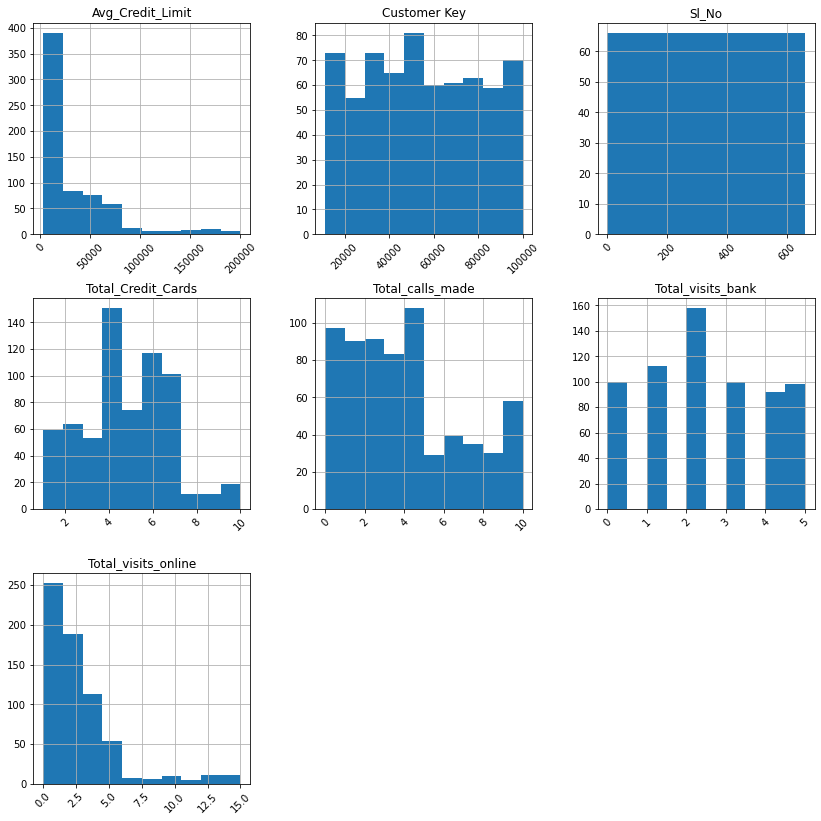

In [14]:
#plot histogram
df.hist(figsize=(14,14), xrot=45)
plt.show()

Text(0, 0.5, 'Avg_Credit_Limit')

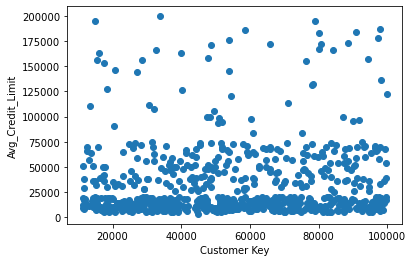

In [15]:
plt.scatter(df['Customer Key'], df['Avg_Credit_Limit'])
plt.xlabel('Customer Key')
plt.ylabel('Avg_Credit_Limit')

Text(0, 0.5, 'Avg_Credit_Limit')

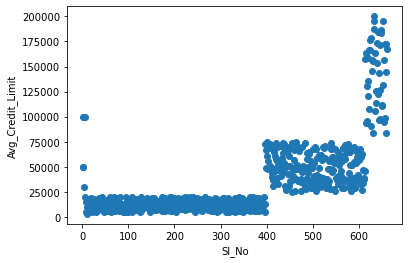

In [16]:
plt.scatter(df['Sl_No'], df['Avg_Credit_Limit'])
plt.xlabel('Sl_No')
plt.ylabel('Avg_Credit_Limit')

In [17]:
#there are 3 groups of customers seen according to Avg_Credit_Limit

Total_visits_bank      1586
Total_visits_online    1720
Total_calls_made       2365
dtype: int64

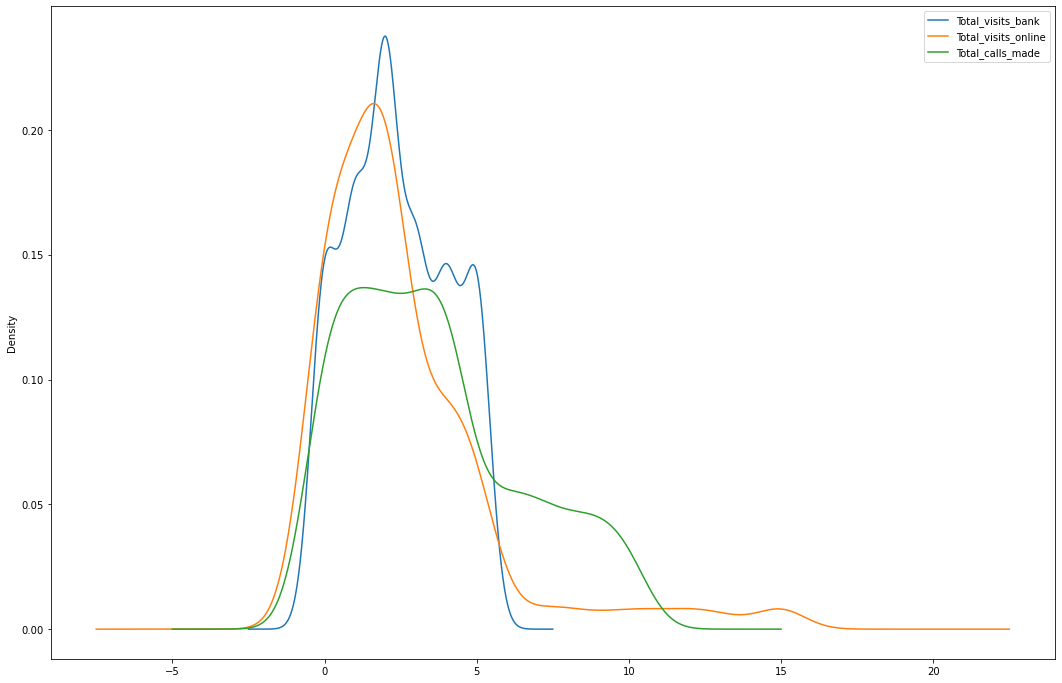

In [18]:
df[['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].plot.kde(figsize=(18, 12))
df[['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].sum()

In [19]:
# Observations:
# 1. There are 3 ways to offer customer service.
# 2. Most customers prefer to make telephone calls followed by online visits and lastly bank visits.

Text(0.5, 1.0, 'Correlation Matrix')

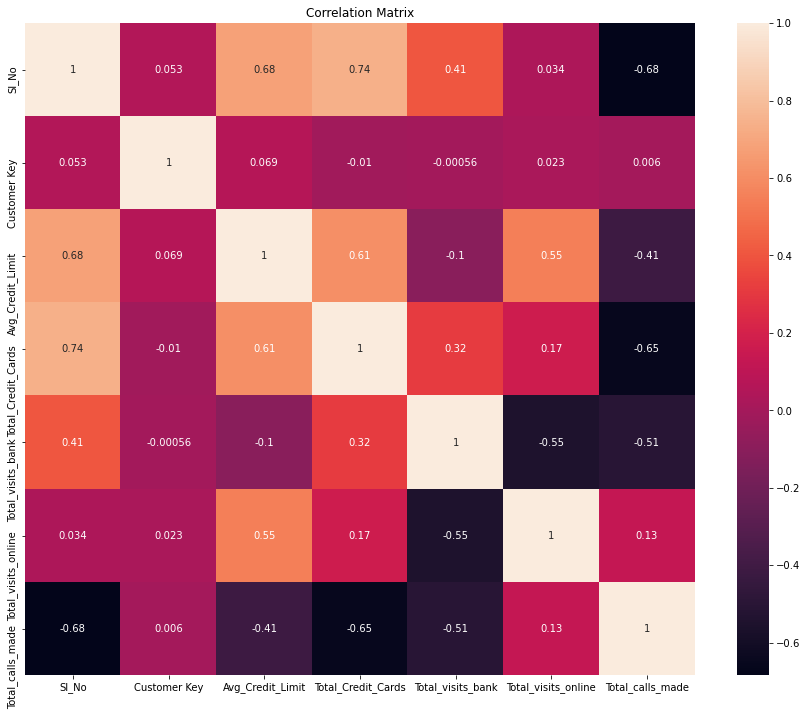

In [20]:
# Validation of the pair-plot and scatter plot views via Pair-wise Pearson Correlations
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

plt.title('Correlation Matrix')

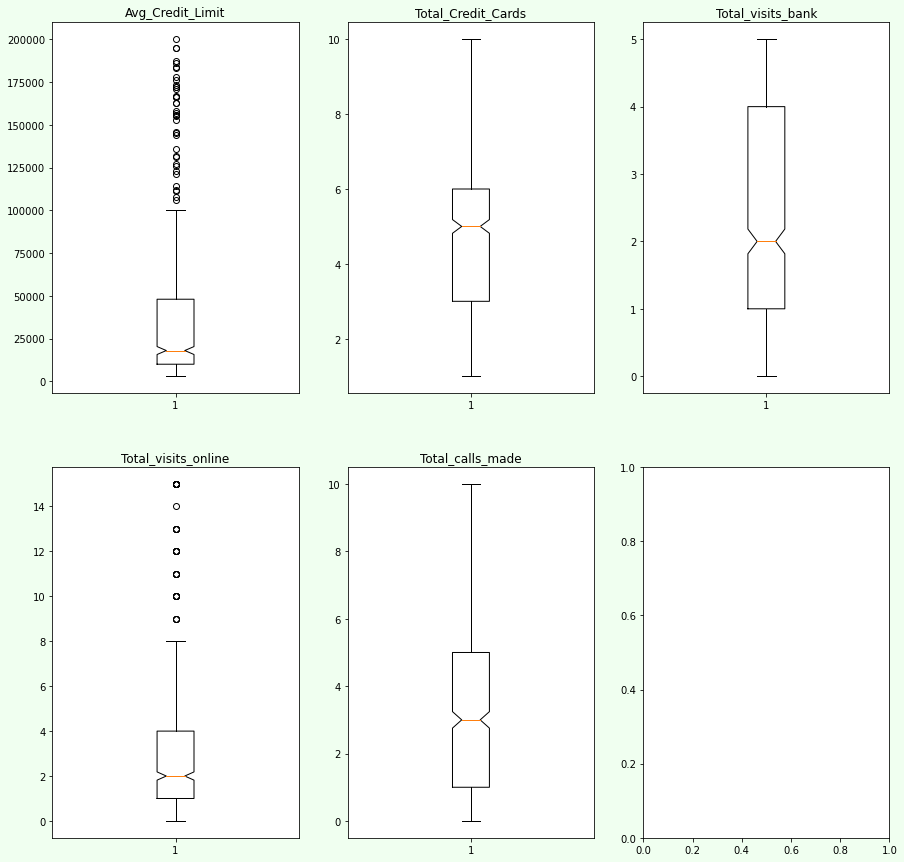

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (15,15))
fig.set_facecolor("honeydew")

axs[0, 0].boxplot(df.Avg_Credit_Limit,notch=True, vert=True)
axs[0, 0].set_title('Avg_Credit_Limit')

axs[0, 1].boxplot(df.Total_Credit_Cards,notch=True, vert=True)
axs[0, 1].set_title('Total_Credit_Cards')

axs[0, 2].boxplot(df.Total_visits_bank,notch=True, vert=True)
axs[0, 2].set_title('Total_visits_bank')

axs[1, 0].boxplot(df.Total_visits_online,notch=True, vert=True)
axs[1, 0].set_title('Total_visits_online')

axs[1, 1].boxplot(df['Total_calls_made'],notch=True,vert=True)
axs[1, 1].set_title('Total_calls_made')


plt.show()

In [22]:
#CLUSTERING

In [23]:
df = pd.read_csv("Credit Card Customer Data.csv")

In [24]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [25]:
credAttr=df.iloc[:,1:]
credScaled=credAttr.apply(zscore)

<function matplotlib.pyplot.show(*args, **kw)>

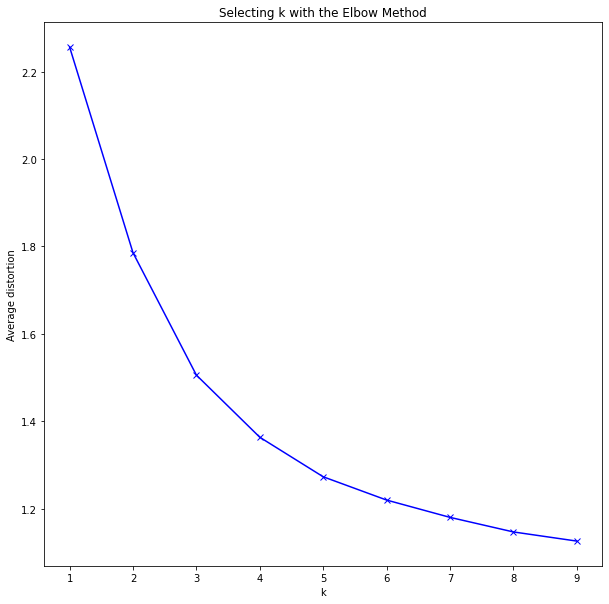

In [26]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(credScaled)
    prediction=model.predict(credScaled)
    meanDistortions.append(sum(np.min(cdist(credScaled, model.cluster_centers_, 'euclidean'), axis=1)) / credScaled.shape[0])

plt.figure(figsize=(10,10))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show

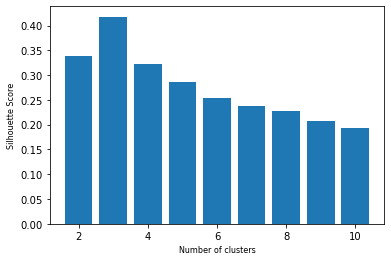

In [27]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(credScaled, KMeans(n_clusters = n_cluster).fit_predict(credScaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 8) 
plt.ylabel('Silhouette Score', fontsize = 8) 
plt.show()

In [28]:
df = pd.read_csv("Credit Card Customer Data.csv")

In [29]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [30]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [31]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

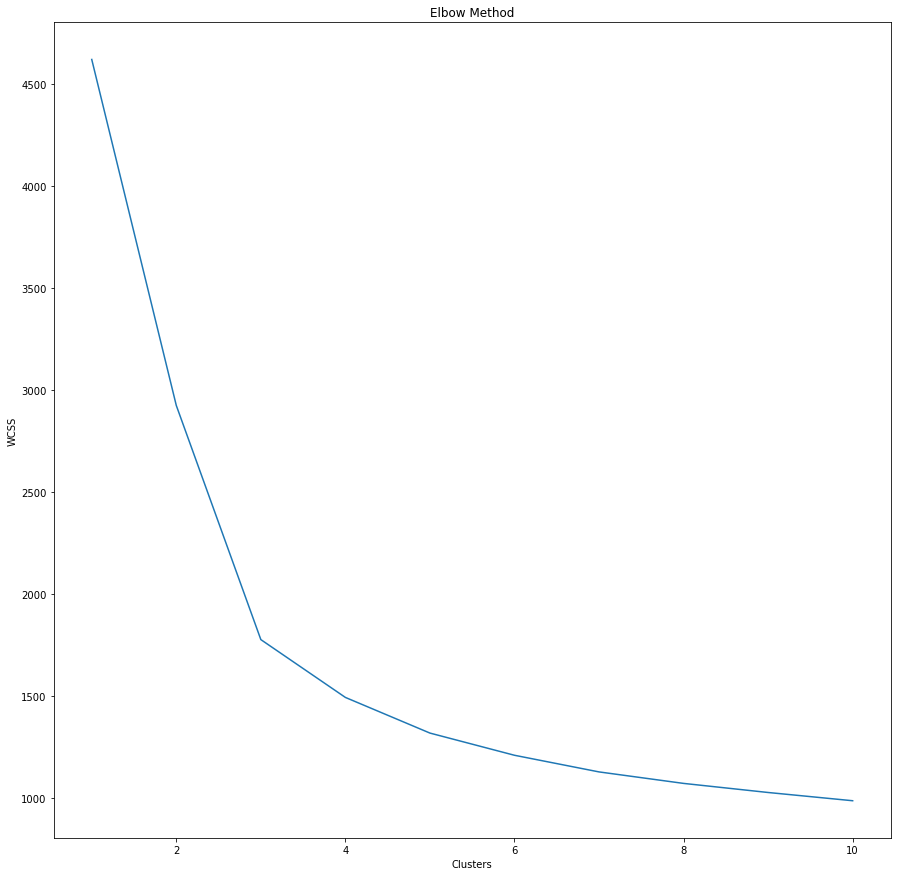

In [32]:
plt.figure(figsize=(15,15))
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

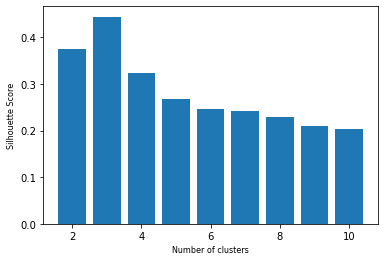

In [33]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 8) 
plt.ylabel('Silhouette Score', fontsize = 8) 
plt.show()

In [34]:
kmeans_values=[]

for cluster in range(2,11):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.375
Silhouette score for 3 cluster k-means: 0.444
Silhouette score for 4 cluster k-means: 0.324
Silhouette score for 5 cluster k-means: 0.267
Silhouette score for 6 cluster k-means: 0.245
Silhouette score for 7 cluster k-means: 0.241
Silhouette score for 8 cluster k-means: 0.230
Silhouette score for 9 cluster k-means: 0.211
Silhouette score for 10 cluster k-means: 0.207


In [35]:
#K = 3
final_model=KMeans(3)
final_model.fit(credScaled)
prediction=final_model.predict(credScaled)

df["GROUP"] = prediction
credScaled["GROUP"] = prediction
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


In [36]:
credClust = df.groupby(['GROUP'])
credClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B603823DC8>,
      dtype=object)

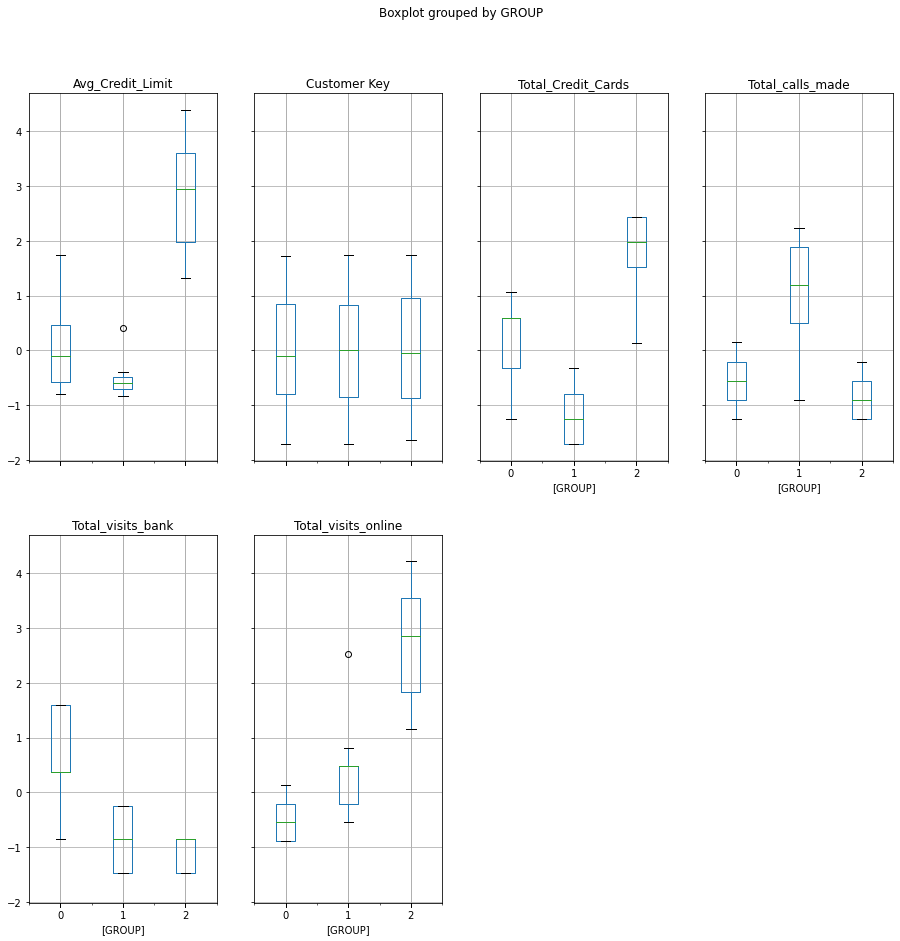

In [37]:
credScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,15))

In [38]:
#K = 4
final_model=KMeans(4)
final_model.fit(credScaled)
prediction=final_model.predict(credScaled)

df["GROUP"] = prediction
credScaled["GROUP"] = prediction
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,3
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


In [39]:
credClust = df.groupby(['GROUP'])
credClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,401.009346,35386.219626,30672.897196,5.453271,3.462617,1.014019,2.051402
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
3,438.081395,79136.872093,37651.162791,5.593023,3.523256,0.941860,1.936047


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B604788248>,
      dtype=object)

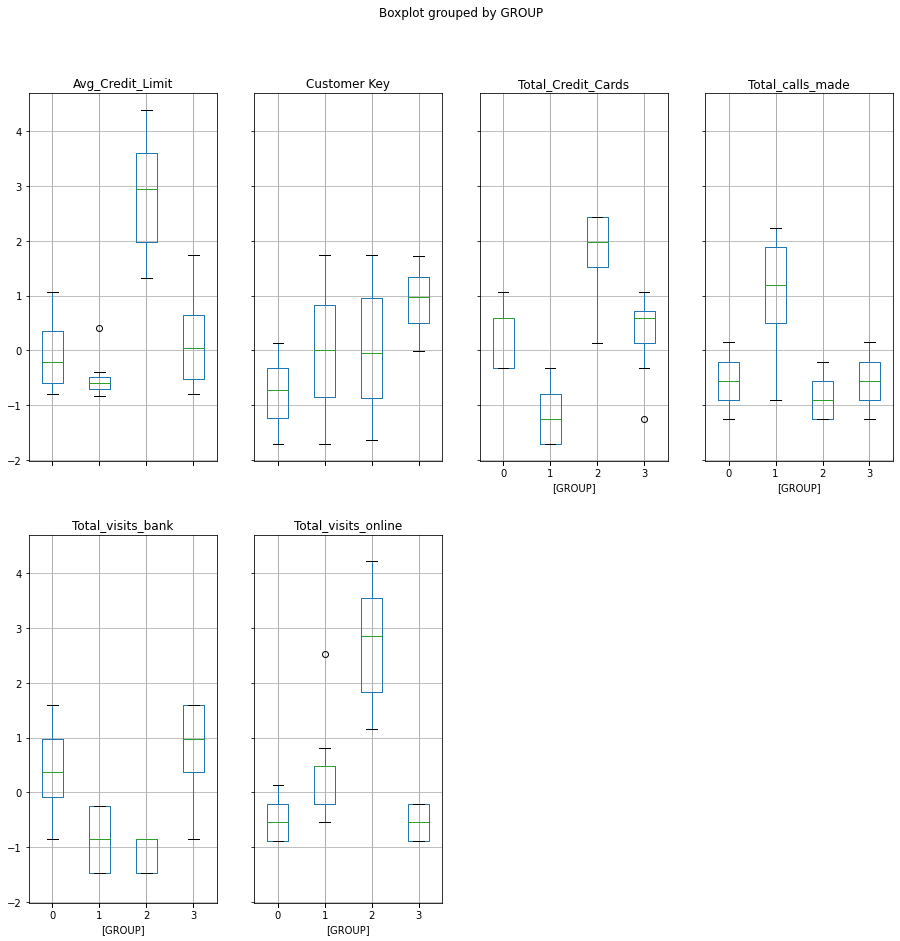

In [40]:
credScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,15))

In [41]:
credScaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


In [42]:
# Determining Number of Clusters with Silhouette Scores Method

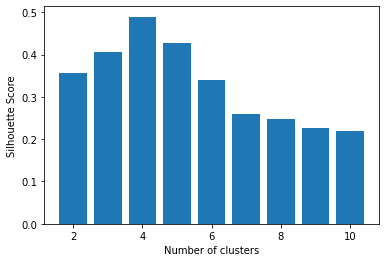

In [43]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(credScaled, KMeans(n_clusters = n_cluster).fit_predict(credScaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [44]:
kmeans_values=[]

for cluster in range(2,10):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.375
Silhouette score for 3 cluster k-means: 0.444
Silhouette score for 4 cluster k-means: 0.324
Silhouette score for 5 cluster k-means: 0.267
Silhouette score for 6 cluster k-means: 0.245
Silhouette score for 7 cluster k-means: 0.241
Silhouette score for 8 cluster k-means: 0.230
Silhouette score for 9 cluster k-means: 0.211


In [45]:
# Hierarchical Clustering
siliuette_list_hierarchical = []

for cluster in range(2,10,1):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [46]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
2,2,0.496966,complete,2
1,2,0.496966,average,2
3,3,0.443941,ward,3
5,3,0.443895,complete,3
8,4,0.436936,complete,4
11,5,0.416409,complete,5
10,5,0.416409,average,5
14,6,0.395322,complete,6
0,2,0.373530,ward,2
13,6,0.372044,average,6


In [47]:
kmeans_      = KMeans(n_clusters=3, random_state=40).fit_predict(df_std)

In [48]:
hierarchical_= AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3).fit_predict(df_std)

In [49]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')

Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')


In [50]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ],['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.443941
1,Hierarchical,0.443941


In [51]:
df['cluster'] = hierarchical_ 

In [52]:
df['cluster'].value_counts()

0    384
1    226
2     50
Name: cluster, dtype: int64

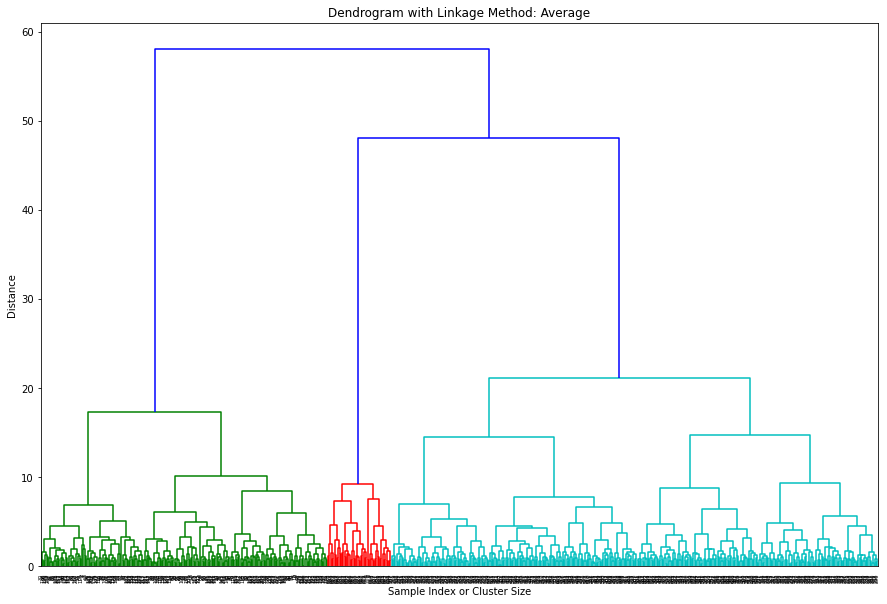

In [53]:
plt.figure(figsize=(15,10)) 
plt.title("Dendrogram with Linkage Method: Average") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(df_std, method='ward')) 
plt.show() 

In [54]:
#PCA

In [55]:
kmeans_       = KMeans(n_clusters=3, random_state=40).fit(df_std)

df['cluster'] = kmeans_.labels_


In [56]:
# Normalizing the df 
df_nor = normalize(df_std) 


# View the new feature df's shape 
df_nor.shape 

(660, 7)

In [57]:
pca = PCA(n_components=2).fit(df_nor)

df_pca2 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (660, 7)
transformed shape: (660, 2)


In [58]:
df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

,A1,A2
0,0.244714,-0.420042
1,0.878707,0.013352
2,0.372266,0.486818
3,0.621759,0.296789
4,0.416120,-0.114309


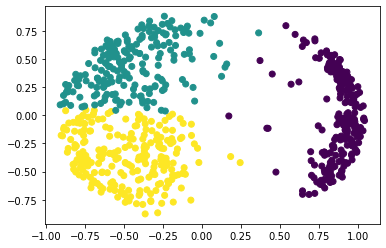

In [59]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c = KMeans(n_clusters=3, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

In [60]:
print(pca.explained_variance_)

[0.44410603 0.18380484]


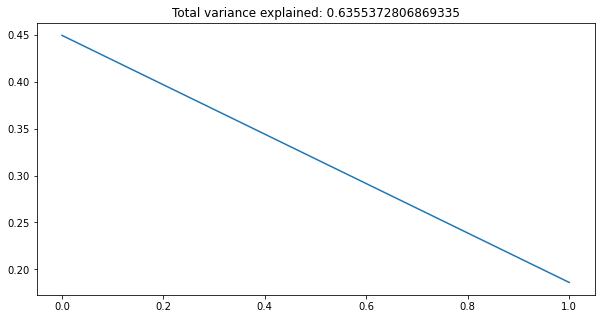

In [61]:
#PCA 2D
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [62]:
#PCA 3D
pca = PCA(n_components=3).fit(df_nor)

df_pca3 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca3.shape)

original shape:    (660, 7)
transformed shape: (660, 3)


In [63]:
df_pca3 = pd.DataFrame(df_pca3) 
df_pca3.columns = ['A1', 'A2', 'A3']
df_pca3.head()

,A1,A2,A3
0,0.244714,-0.420042,0.111265
1,0.878707,0.013352,0.496140
2,0.372266,0.486818,0.385275
3,0.621759,0.296789,-0.008371
4,0.416120,-0.114309,0.721196


In [64]:
df_pca3.columns = ['A1', 'A2','A3'] 

In [65]:
print(pca.explained_variance_)

[0.44410603 0.18380484 0.14652149]


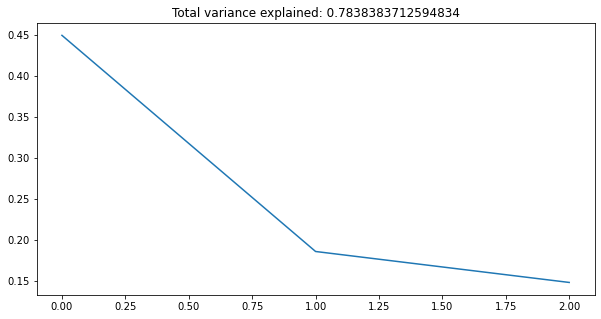

In [66]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [67]:
kmeans5_  = KMeans(n_clusters=3, random_state=40).fit(df_std)
df['cluster'] = kmeans5_.labels_
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,cluster
0,1,87073,100000,2,1,1,0,3,0
1,2,38414,50000,3,0,10,9,1,0
2,3,17341,50000,7,1,3,4,0,0
3,4,40496,30000,5,1,1,4,0,0
4,5,47437,100000,6,0,12,3,2,2
...,...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2,2
656,657,60732,84000,10,1,13,2,2,2
657,658,53834,145000,8,1,9,1,2,2
658,659,80655,172000,10,1,15,0,2,2


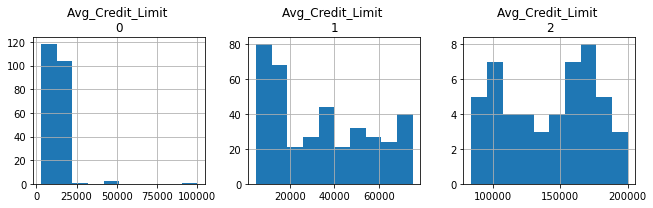

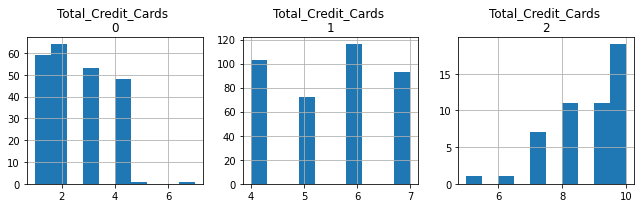

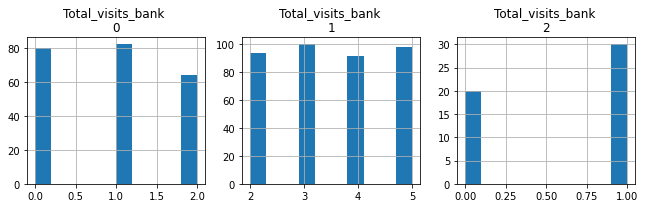

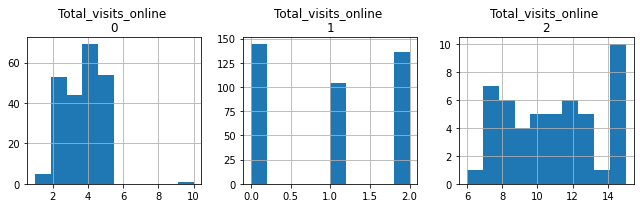

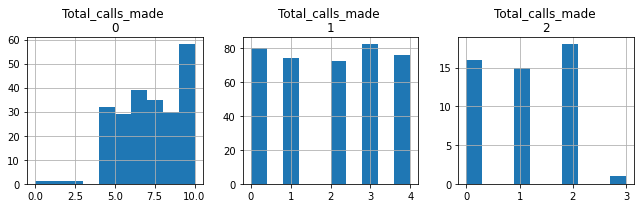

In [68]:
col_list= ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,3):
        plt.subplot(1,5,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

In [69]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'GROUP',
       'cluster'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

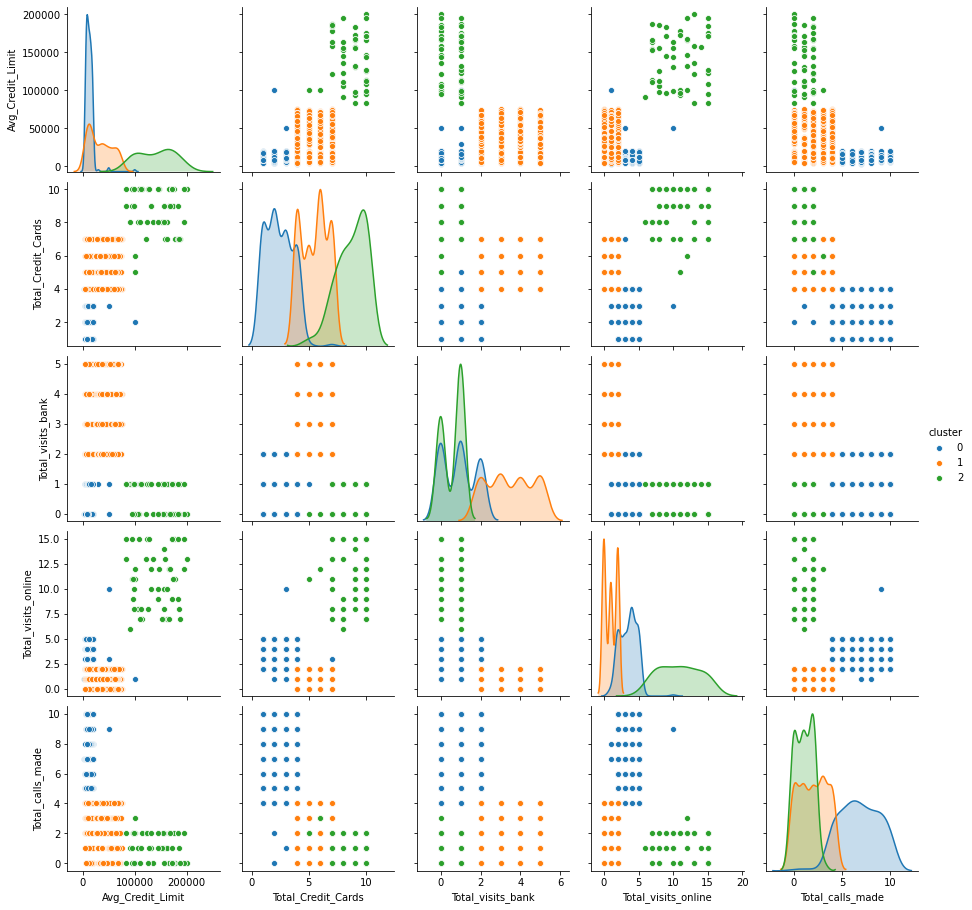

In [70]:
best_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


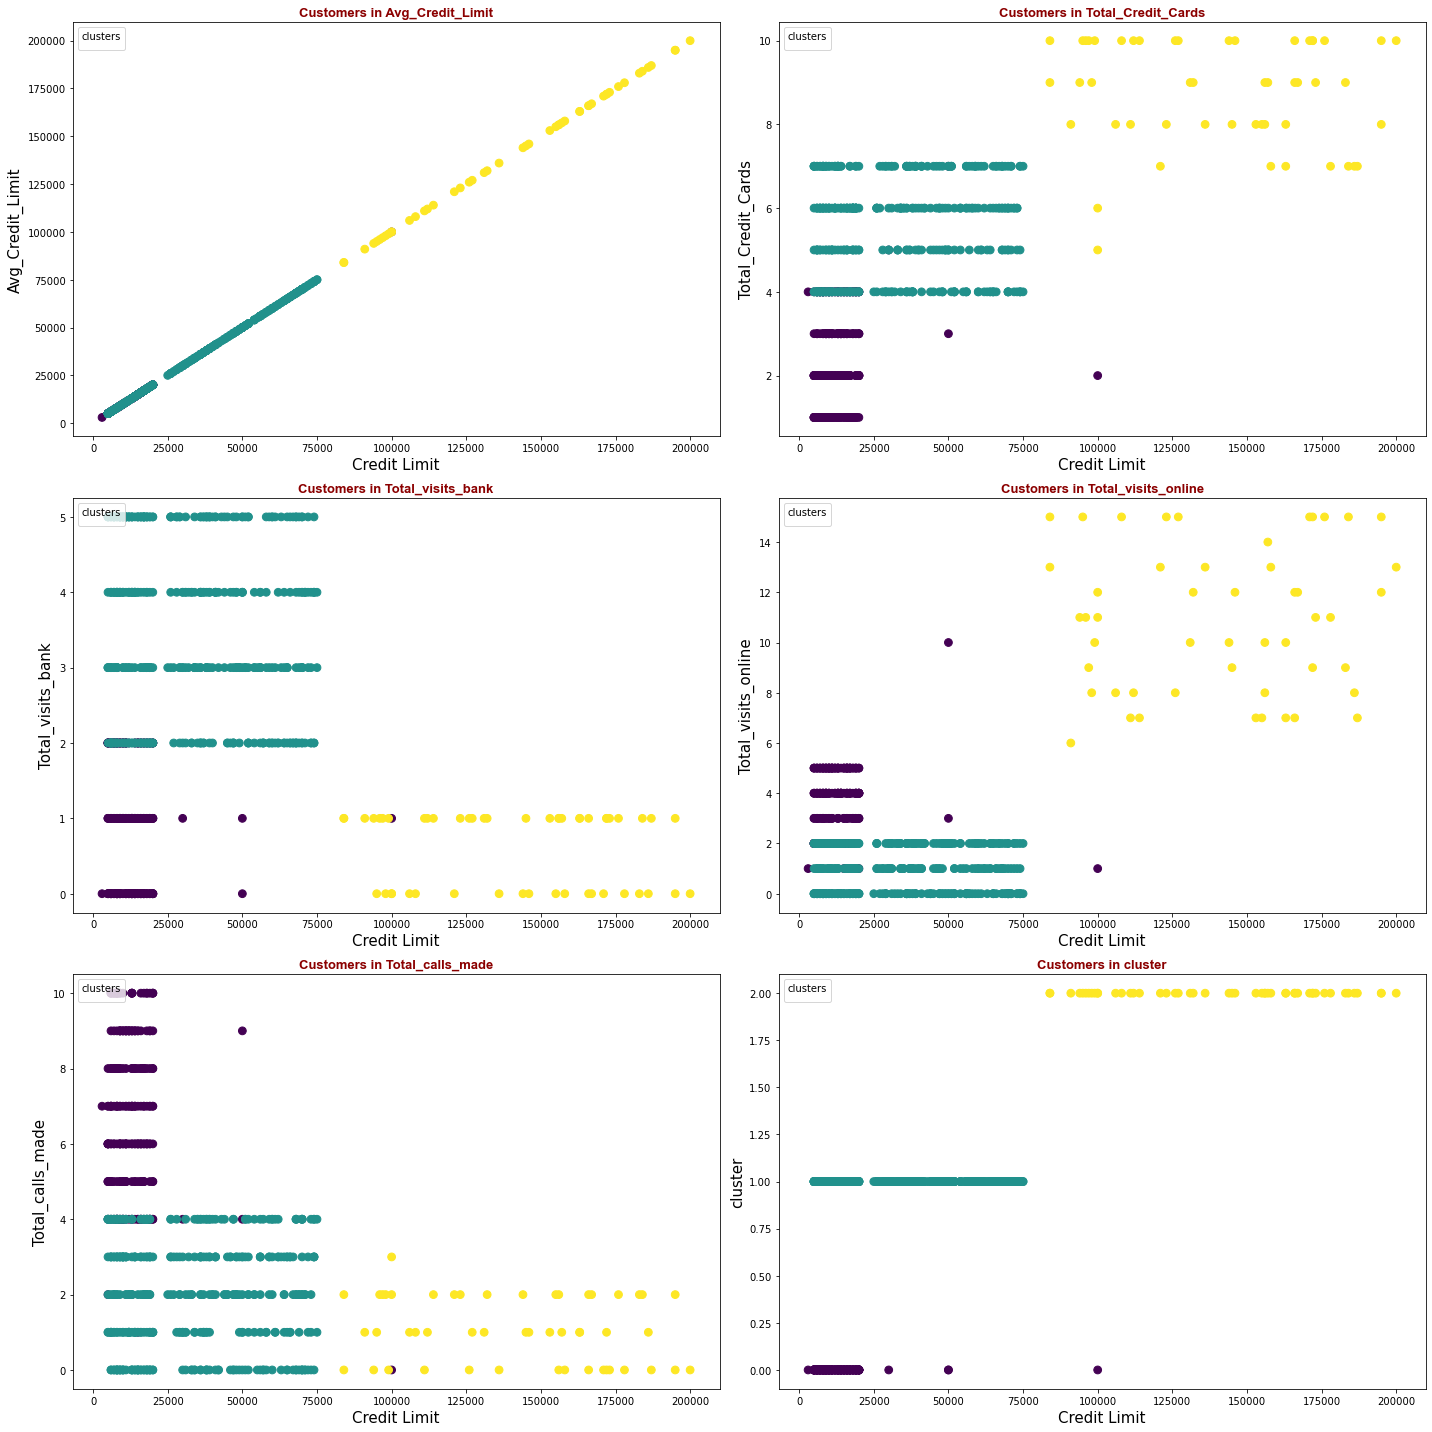

In [71]:
fig, axes = plt.subplots(3,2,figsize=(20,20))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 14 }

for i in range(0,6):
    
    plt.subplot(3, 2, i+1)
    plt.scatter(df['Avg_Credit_Limit'], df[best_columns[i]], c= df['cluster'], s=60)
    legend = plt.legend(loc="upper left", title="clusters")
    plt.title('Customers in '+ str(best_columns[i]), fontdict=title_font, fontsize=13)
    plt.xlabel('Credit Limit',size=15)
    plt.ylabel(str(best_columns[i]),size=15)
    

plt.tight_layout()
plt.show()

In [72]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(df_std)
df['cluster'] = kmeans4_.labels_

In [73]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'GROUP',
       'cluster'],
      dtype='object')

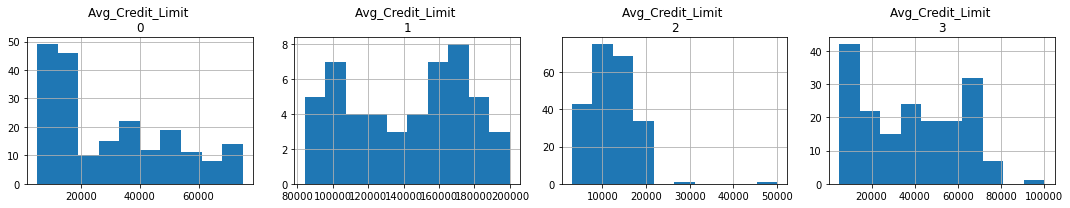

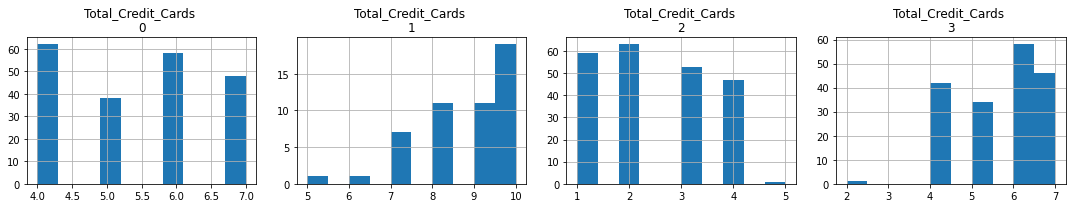

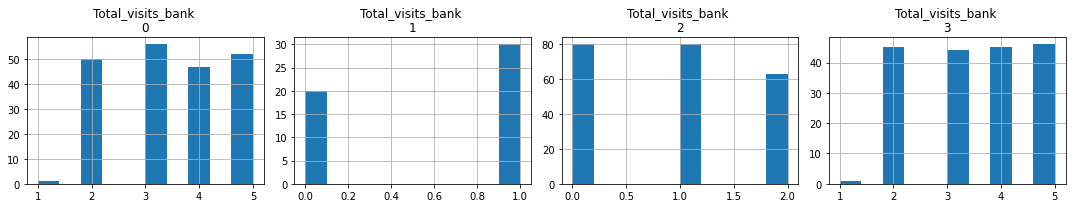

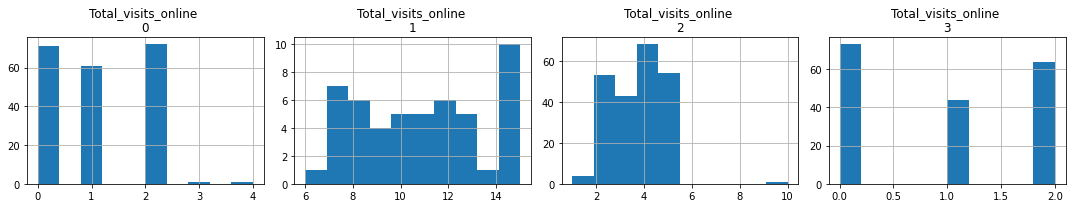

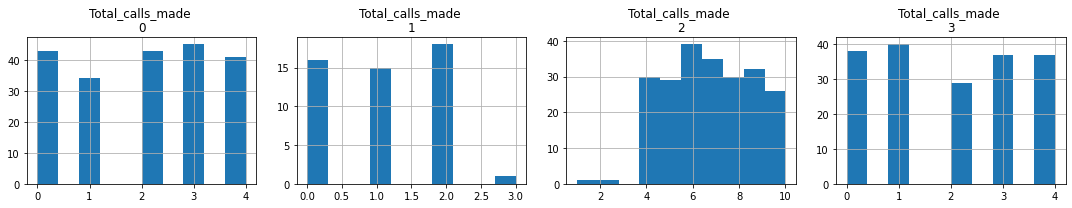

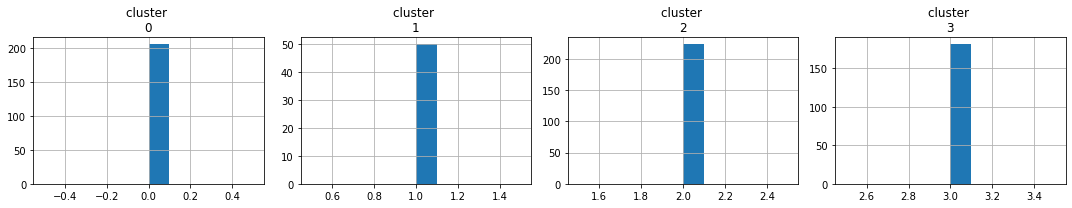

In [74]:
col_list= ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'cluster']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

<Figure size 1800x1800 with 0 Axes>

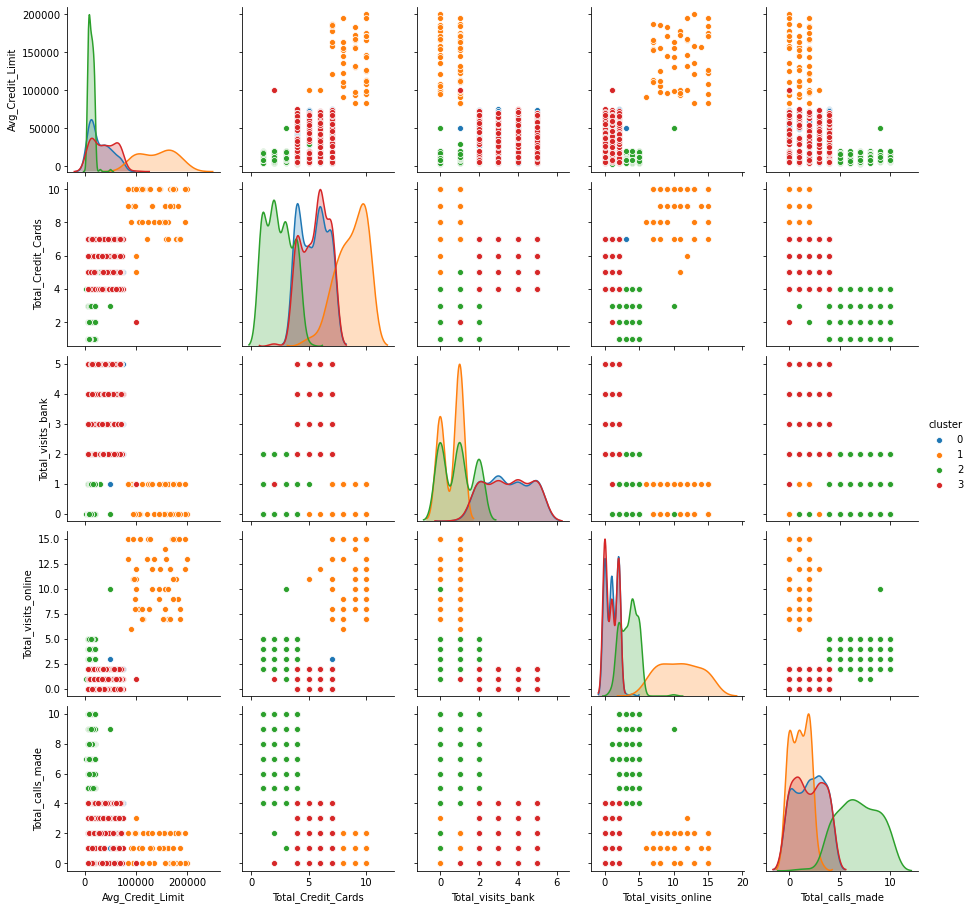

In [75]:
best_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

In [76]:
#This study aims customer segmentation by using customer behaviors.
#Compering 2 different Kmeans Models showed that we have a better understanding of customer segmentation by using the 4 clusters model.